# COMP 482 Mini Project

## Comparison of Data Mining Algorithms

### By: Aayush Pokharel & Saurav Ghimire

---


## Basic Setup


##### Importing all the necessary libraries


In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)

##### Fetching the Dataset

Due to reasons of familiarity and the dataset's simplicity, the Iris Dataset was chosen from UCI Machine Learning Repo.


In [3]:
# fetch dataset
iris = fetch_ucirepo(id=53)

# Extract features (X) and target variable (y)
X = iris.data.features
y = iris.data.targets

##### Creating a dataframe for use


In [4]:
# Create a DataFrame
df = pd.DataFrame(X)
df["target"] = y
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Exploratory Data Aanlysis


##### Displaying Basic Information


In [5]:
# Display the first few rows of the DataFrame (features)
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Getting the summary of the DataFrame, including the number of rows and columns,
# the data type of each column, and the number of non-missing values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Getting the descriptive statistics for numerical features
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### Exploring the Numerical Distributions


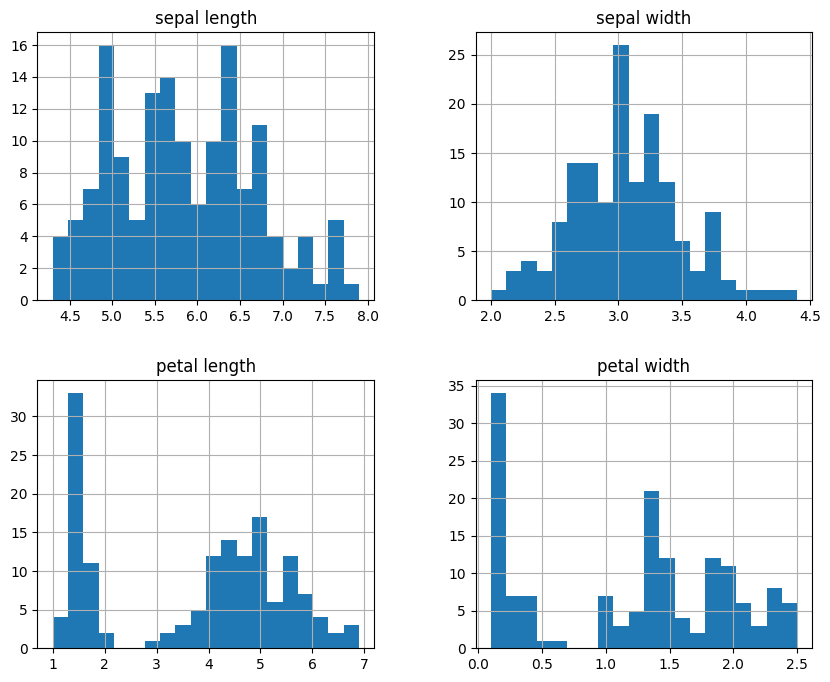

In [8]:
# Plotting histograms for numerical features
df.hist(figsize=(10, 8), bins=20)
plt.show()

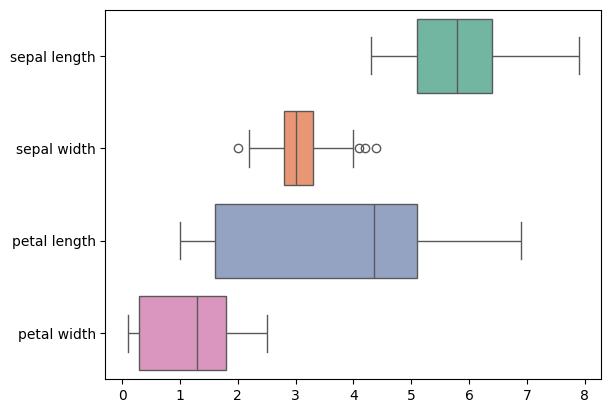

In [9]:
# Box plots for numerical features
sns.boxplot(data=df, orient="h", palette="Set2")
plt.show()

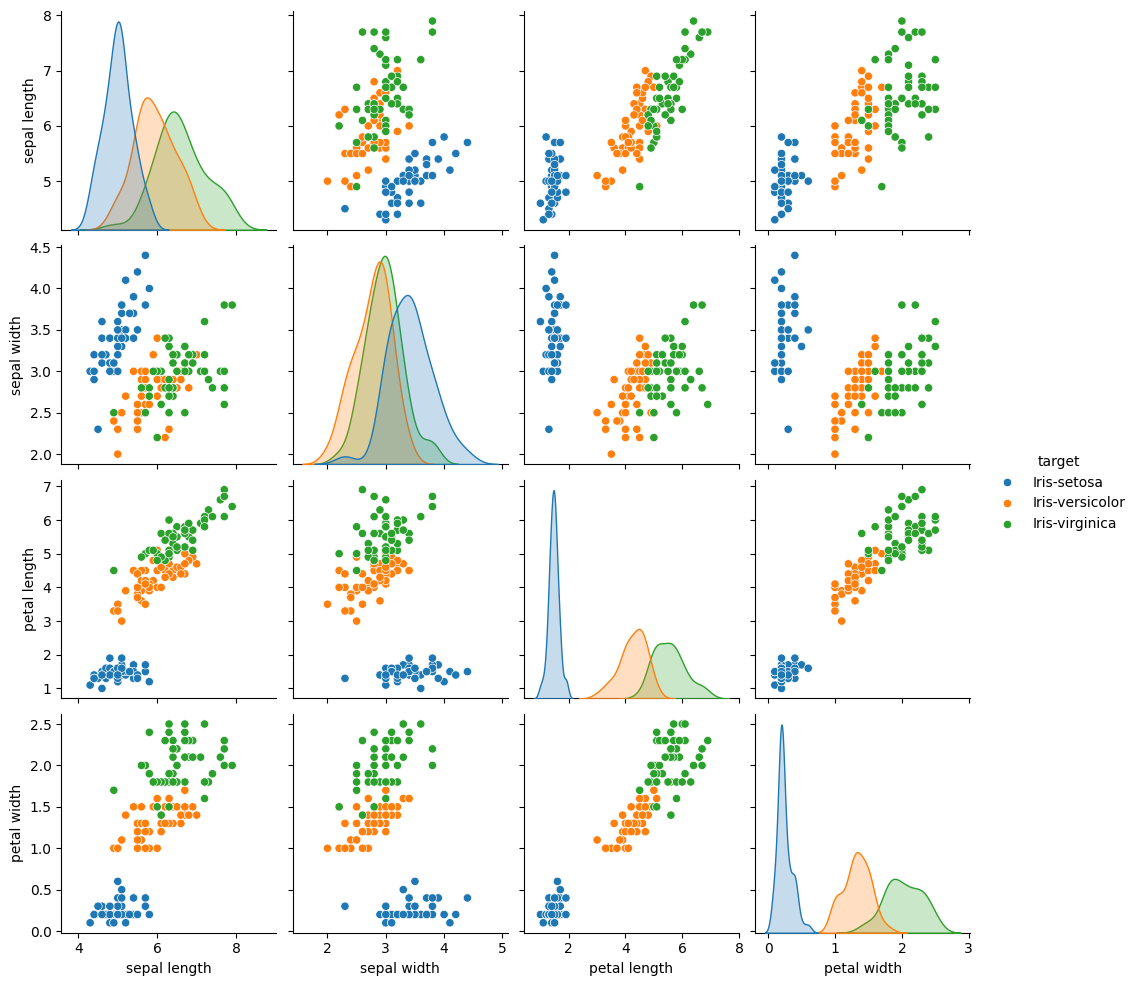

In [10]:
# Pair Plot
sns.pairplot(df, hue="target")
plt.show()

##### Analyzing the Categorical Features

The Iris dataset doesn't have any categorical features so this step is skipped.


## Data Cleaning


##### Handling Missing Values


In [11]:
# Checking for missing values
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
target          0
dtype: int64

##### Checking for Duplicates


In [12]:
# Handling Duplicate Values
df.drop_duplicates(inplace=True)
df.shape

(147, 5)

## Correlation Analysis

##### Analyzing Using Correlation Matrix


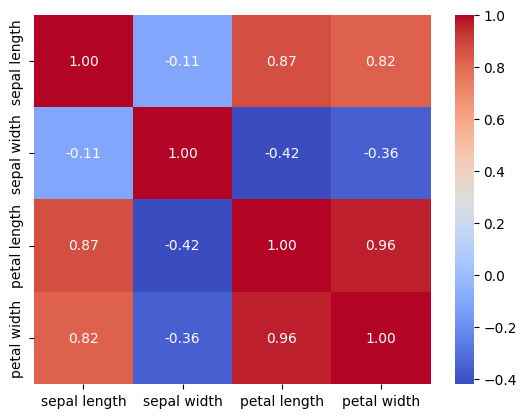

In [13]:
# Heatmap of correlation matrix for numerical features
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

## Outlier Detection

##### Using Box and Whiskers Diagram


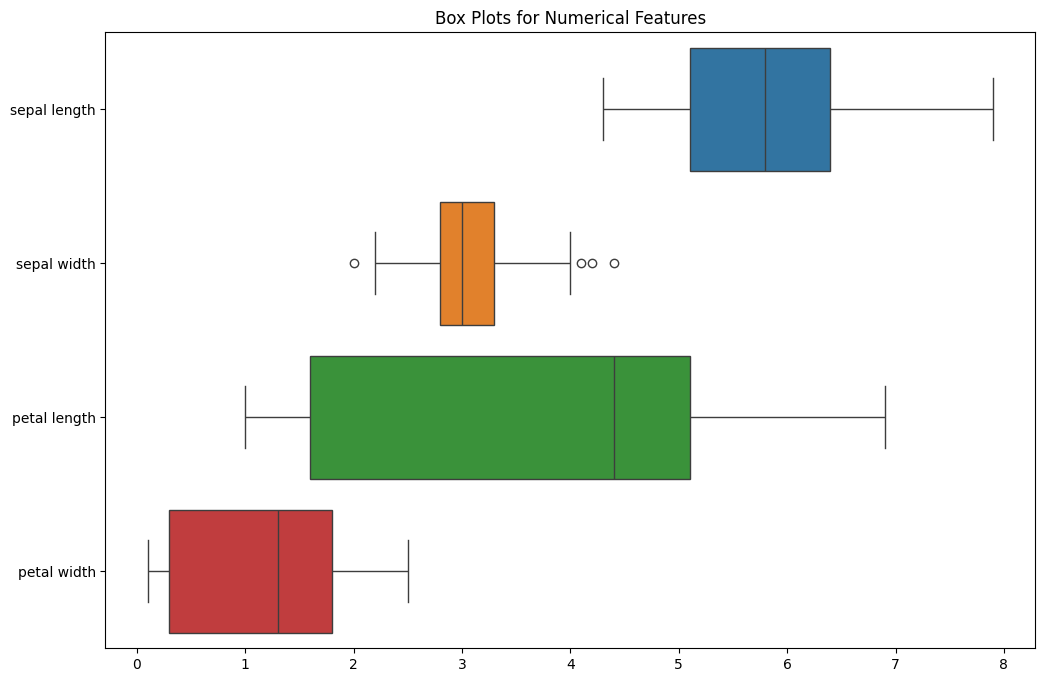

In [14]:
# Box plots to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df,
    orient="h",
)
plt.title("Box Plots for Numerical Features")
plt.show()

##### Using Scatter Plot with IQR


Indices of outliers:
Index([15, 32, 33, 60], dtype='int64')

Scatter Plot with Outliers Highlighted:


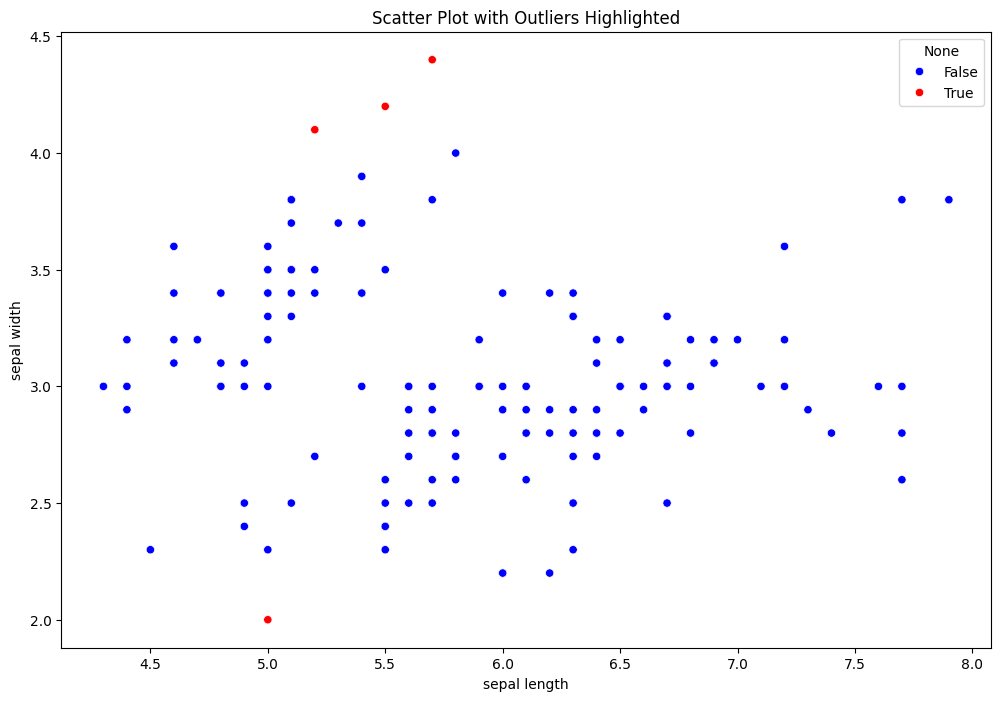

In [15]:
# Calculate the IQR for each feature
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Identifying the outliers using the IQR method
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)

# Print the indices of the outliers
print("Indices of outliers:")
print(outliers[outliers].index)

# Scatter plot with outliers highlighted
print("\nScatter Plot with Outliers Highlighted:")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="sepal length",
    y="sepal width",
    hue=outliers,
    palette={False: "blue", True: "red"},
    data=df,
)
plt.title("Scatter Plot with Outliers Highlighted")
plt.show()

##### Removing Outliers


In [16]:
# Remove outliers from the dataset
X_no_outliers = X[~outliers]
y_no_outliers = y[~outliers]

# Check the shape of the dataset after removing outliers
print("\nShape before removing outliers:", X.shape)
print("Shape after removing outliers:", X_no_outliers.shape)


Shape before removing outliers: (150, 4)
Shape after removing outliers: (146, 4)


## Classification

##### Initalizing KNN and Naive Baise Classifier and Using K-Fold Cross Validation (with Outliers included)

Spliting the Dataset into testing and training data using K-fold cross validation method.


In [17]:
# Performing k-fold cross-validation for KNN and Naive Bayes on the original dataset
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

#### Performing Cross-Validation and Calculate Metrics for KNN (with Outliers included)


In [19]:
precision_scores_knn, recall_scores_knn, f1_scores_knn, confusion_matrices_knn = (
    [],
    [],
    [],
    [],
)

# Perform cross-validation for KNN
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit and predict with KNN
    knn_classifier.fit(X_train, y_train.values.ravel())
    knn_pred = knn_classifier.predict(X_test)

    # Calculate metrics for KNN
    precision_scores_knn.append(precision_score(y_test, knn_pred, average="weighted"))
    recall_scores_knn.append(recall_score(y_test, knn_pred, average="weighted"))
    f1_scores_knn.append(f1_score(y_test, knn_pred, average="weighted"))
    confusion_matrices_knn.append(confusion_matrix(y_test, knn_pred))

#### Performing Cross-Validation and Calculate Metrics for Naive Bayes (with Outliers included)


In [20]:
precision_scores_nb, recall_scores_nb, f1_scores_nb, confusion_matrices_nb = (
    [],
    [],
    [],
    [],
)

# Perform cross-validation for Naive Bayes
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit and predict with Naive Bayes
    nb_classifier.fit(X_train, y_train.values.ravel())
    nb_pred = nb_classifier.predict(X_test)

    # Calculate metrics for Naive Bayes
    precision_scores_nb.append(precision_score(y_test, nb_pred, average="weighted"))
    recall_scores_nb.append(recall_score(y_test, nb_pred, average="weighted"))
    f1_scores_nb.append(f1_score(y_test, nb_pred, average="weighted"))
    confusion_matrices_nb.append(confusion_matrix(y_test, nb_pred))

#### Printing Results (with Outliers included)


In [22]:
# Print results for KNN
print("\nKNN Metrics:")
print(f"Mean Precision: {sum(precision_scores_knn) / len(precision_scores_knn):.4f}")
print(f"Mean Recall: {sum(recall_scores_knn) / len(recall_scores_knn):.4f}")
print(f"Mean F1 Score: {sum(f1_scores_knn) / len(f1_scores_knn):.4f}")
print(
    f"Mean Confusion Matrix:\n{sum(confusion_matrices_knn) // len(confusion_matrices_knn)}"
)


# Print results for Naive Bayes
print("\nNaive Bayes Metrics:")
print(f"Mean Precision: {sum(precision_scores_nb) / len(precision_scores_nb):.4f}")
print(f"Mean Recall: {sum(recall_scores_nb) / len(recall_scores_nb):.4f}")
print(f"Mean F1 Score: {sum(f1_scores_nb) / len(f1_scores_nb):.4f}")
print(
    f"Mean Confusion Matrix:\n{sum(confusion_matrices_nb) // len(confusion_matrices_nb)}"
)


KNN Metrics:
Mean Precision: 0.9736
Mean Recall: 0.9667
Mean F1 Score: 0.9655
Mean Confusion Matrix:
[[5 0 0]
 [0 4 0]
 [0 0 4]]

Naive Bayes Metrics:
Mean Precision: 0.9676
Mean Recall: 0.9600
Mean F1 Score: 0.9603
Mean Confusion Matrix:
[[5 0 0]
 [0 4 0]
 [0 0 4]]


In [27]:
# Initializing K-Fold Cross-Validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the KNN classifier for dataset without outliers
knn_classifier_no_outliers = KNeighborsClassifier(n_neighbors=3)

# Initialize the Naive Bayes classifier for dataset without outliers
nb_classifier_no_outliers = GaussianNB()

In [24]:
(
    precision_scores_knn_no_outliers,
    recall_scores_knn_no_outliers,
    f1_scores_knn_no_outliers,
    confusion_matrices_knn_no_outliers,
) = ([], [], [], [])

# Perform cross-validation for KNN (Dataset Without Outliers)
for train_index, test_index in kf.split(X_no_outliers):
    X_train, X_test = X_no_outliers.iloc[train_index], X_no_outliers.iloc[test_index]
    y_train, y_test = y_no_outliers.iloc[train_index], y_no_outliers.iloc[test_index]

    # Fit and predict with KNN (Dataset Without Outliers)
    knn_classifier_no_outliers.fit(X_train, y_train.values.ravel())
    knn_pred_no_outliers = knn_classifier_no_outliers.predict(X_test)

    # Calculate metrics for KNN (Dataset Without Outliers)
    precision_scores_knn_no_outliers.append(
        precision_score(y_test, knn_pred_no_outliers, average="weighted")
    )
    recall_scores_knn_no_outliers.append(
        recall_score(y_test, knn_pred_no_outliers, average="weighted")
    )
    f1_scores_knn_no_outliers.append(
        f1_score(y_test, knn_pred_no_outliers, average="weighted")
    )
    confusion_matrices_knn_no_outliers.append(
        confusion_matrix(y_test, knn_pred_no_outliers)
    )

In [25]:
(
    precision_scores_nb_no_outliers,
    recall_scores_nb_no_outliers,
    f1_scores_nb_no_outliers,
    confusion_matrices_nb_no_outliers,
) = ([], [], [], [])

# Perform cross-validation for Naive Bayes (Dataset Without Outliers)
for train_index, test_index in kf.split(X_no_outliers):
    X_train, X_test = X_no_outliers.iloc[train_index], X_no_outliers.iloc[test_index]
    y_train, y_test = y_no_outliers.iloc[train_index], y_no_outliers.iloc[test_index]

    # Fit and predict with Naive Bayes (Dataset Without Outliers)
    nb_classifier_no_outliers.fit(X_train, y_train.values.ravel())
    nb_pred_no_outliers = nb_classifier_no_outliers.predict(X_test)

    # Calculate metrics for Naive Bayes (Dataset Without Outliers)
    precision_scores_nb_no_outliers.append(
        precision_score(y_test, nb_pred_no_outliers, average="weighted")
    )
    recall_scores_nb_no_outliers.append(
        recall_score(y_test, nb_pred_no_outliers, average="weighted")
    )
    f1_scores_nb_no_outliers.append(
        f1_score(y_test, nb_pred_no_outliers, average="weighted")
    )
    confusion_matrices_nb_no_outliers.append(
        confusion_matrix(y_test, nb_pred_no_outliers)
    )

In [26]:
# Print results for KNN (Dataset Without Outliers)
print("\nKNN Metrics (Dataset Without Outliers):")
print(
    f"Mean Precision: {sum(precision_scores_knn_no_outliers) / len(precision_scores_knn_no_outliers):.4f}"
)
print(
    f"Mean Recall: {sum(recall_scores_knn_no_outliers) / len(recall_scores_knn_no_outliers):.4f}"
)
print(
    f"Mean F1 Score: {sum(f1_scores_knn_no_outliers) / len(f1_scores_knn_no_outliers):.4f}"
)
print(
    f"Mean Confusion Matrix:\n{sum(confusion_matrices_knn_no_outliers) // len(confusion_matrices_knn_no_outliers)}"
)


# Print results for Naive Bayes (Dataset Without Outliers)
print("\nNaive Bayes Metrics (Dataset Without Outliers):")
print(
    f"Mean Precision: {sum(precision_scores_nb_no_outliers) / len(precision_scores_nb_no_outliers):.4f}"
)
print(
    f"Mean Recall: {sum(recall_scores_nb_no_outliers) / len(recall_scores_nb_no_outliers):.4f}"
)
print(
    f"Mean F1 Score: {sum(f1_scores_nb_no_outliers) / len(f1_scores_nb_no_outliers):.4f}"
)
print(
    f"Mean Confusion Matrix:\n{sum(confusion_matrices_nb_no_outliers) // len(confusion_matrices_nb_no_outliers)}"
)


KNN Metrics (Dataset Without Outliers):
Mean Precision: 0.9587
Mean Recall: 0.9524
Mean F1 Score: 0.9524
Mean Confusion Matrix:
[[4 0 0]
 [0 4 0]
 [0 0 4]]

Naive Bayes Metrics (Dataset Without Outliers):
Mean Precision: 0.9588
Mean Recall: 0.9524
Mean F1 Score: 0.9531
Mean Confusion Matrix:
[[4 0 0]
 [0 4 0]
 [0 0 4]]
